**Import Libraries**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import classification_report

In [2]:
!pip install tqdm

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Generate Data**

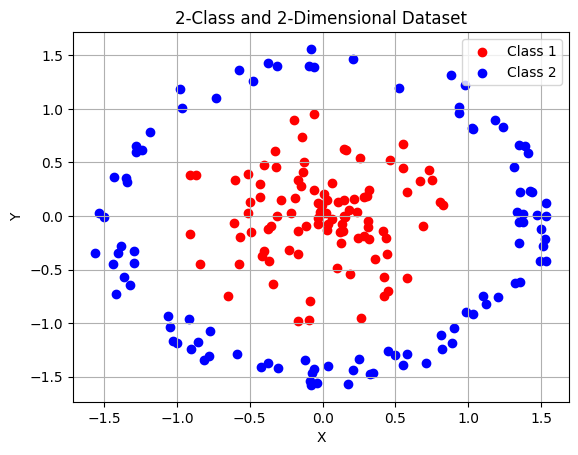

In [3]:
# class 1 
radius_1 = np.random.uniform(low=0, high=1, size=100)
angle_1 = np.random.uniform(low=0, high=2*np.pi, size=100)
x_1 = radius_1 * np.cos(angle_1)
y_1 = radius_1 * np.sin(angle_1)

# Class 2
radius_2 = np.random.uniform(low=1.3, high=1.6, size=100)
angle_2 = np.random.uniform(low=0, high=2*np.pi, size=100)
x_2 = radius_2 * np.cos(angle_2)
y_2 = radius_2 * np.sin(angle_2)

# Plot
plt.scatter(x_1, y_1, c='red', label='Class 1')
plt.scatter(x_2, y_2, c='blue', label='Class 2')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('2-Class and 2-Dimensional Dataset')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
# Create the target labels for the classes
labels_1 = np.zeros_like(x_1)
labels_2 = np.ones_like(x_2)

# Combine the data and labels
data = np.concatenate([np.column_stack((x_1, y_1, labels_1)), np.column_stack((x_2, y_2, labels_2))], axis=0)
np.random.shuffle(data)  # Shuffling the data

In [5]:
data

array([[ 4.97270864e-01, -1.29654073e+00,  1.00000000e+00],
       [-9.13484820e-01,  3.78766560e-01,  0.00000000e+00],
       [-1.02428066e+00, -1.16989728e+00,  1.00000000e+00],
       [ 5.24031547e-01,  1.19831820e+00,  1.00000000e+00],
       [-9.66775212e-01,  1.00520401e+00,  1.00000000e+00],
       [ 1.34688210e+00, -2.54476347e-01,  1.00000000e+00],
       [ 2.51827432e-01, -1.33844959e+00,  1.00000000e+00],
       [ 8.13350142e-01, -1.11166062e+00,  1.00000000e+00],
       [-1.18414034e+00,  7.81583166e-01,  1.00000000e+00],
       [ 1.75613128e-01, -1.56500882e+00,  1.00000000e+00],
       [ 8.82329268e-01,  1.31419922e+00,  1.00000000e+00],
       [ 1.34776535e-01, -7.05300804e-02,  0.00000000e+00],
       [ 1.37878504e+00,  2.02797108e-02,  1.00000000e+00],
       [-1.16534956e-01, -9.66277541e-02,  0.00000000e+00],
       [-7.18541538e-02, -1.46883056e+00,  1.00000000e+00],
       [-8.52832122e-01, -1.17174688e+00,  1.00000000e+00],
       [ 1.49350398e-01,  1.46383900e-01

**Implement Madeline**

In [6]:
class MadaLine():
	def __init__(self, features_dimension = 2, hidden_units = 2, learning_rate = 0.01, threshold = 0.05, stop_threshold = 1e-10):

		self.hidden_units = hidden_units
		self.features_dimension = features_dimension

		self.weights_1 = np.random.randn(hidden_units, features_dimension) * 0.001
		self.bias_1 = np.random.randn(hidden_units, 1) * 0.001
		self.weights_2 = np.array ([1 / hidden_units] * hidden_units).T
		self.bias_2 = (hidden_units - 1) / hidden_units
		self.learning_rate = learning_rate
		self.threshold = threshold
		self.stop_threshold = stop_threshold
		self.loss_function = []
		self.cost_function = []

	def activation_function(self, g):
		return ((g >= 0) - 0.5) * 2

	def loss_calculation(self, target, net):
		return 0.5 * np.power (target - net, 2)

	def cost_calculation(self, loss):
		return np.mean(loss)

	def forward_propagation(self, Xi):

		Xi = Xi.reshape(Xi.shape[0], 1)
		Z_in = np.dot(self.weights_1, Xi) + self.bias_1
		Z = self.activation_function (Z_in).reshape (Z_in.shape[0], 1)
		Y_in = np.dot(self.weights_2, Z) + self.bias_2
		y = self.activation_function(Y_in)

		return Z_in, Y_in, y

	def backward_propagation(self, Xi, target, Z_in, y):
		if y != target:
			Z_in = Z_in.flatten()
			if target == 1:
				close_to_zero_index = np.argmin(abs(Z_in))

				dW = Xi * (1 - Z_in[close_to_zero_index])
				db = 1 - Z_in[close_to_zero_index]
				self.weights_1[close_to_zero_index, :] += self.learning_rate * dW
				self.bias_1[close_to_zero_index] += self.learning_rate * db

			elif target == -1:
				for index in range(self.hidden_units):
					if Z_in[index] > 0:
						dW = Xi * (-1 - Z_in[index])
						db = -1 - Z_in[index]

						self.weights_1[index, :] += self.learning_rate * dW
						self.bias_1[index] += self.learning_rate * db
			return True
		return False

	def train(self, X, Y, n_iterations = 1000):

		from sklearn.utils import shuffle

		X, Y = shuffle(X, Y, random_state = 69)

		for _ in tqdm(range(n_iterations)):
			self.loss_function = []
			updating_changes = []
			for x, target in zip(X, Y):
				Z_in, Y_in, y = self.forward_propagation(x)
				updating_changes.append(self.backward_propagation(x, target, Z_in, y))
				self.loss_function.append(self.loss_calculation(target, y))
				
			self.cost_function.append(self.cost_calculation(self.loss_function))
			if not any(updating_changes):
				print ("No more weight updating ...")
				return
			elif self.threshold > self.cost_calculation(self.loss_function):
				print ("Cost reached the minimum threshold ...")
				return
		print ("Maximum Number of Iterations has been completed ...")

	def evaluation(self, X, Y):
		predicts = []
		for x in X:
			y = self.forward_propagation(x)[2]
			predicts.append(y)
		from sklearn.metrics import classification_report
		print (classification_report(Y, predicts))

	def prediction(self, X):
		Y = []
		for x in X:
			Z_in, Y_in, y = self.forward_propagation(x)
			Y.append (y)
		return np.array (Y)

	# Visualization

	def plot_loss(self):
		plt.plot(self.cost_function, c = 'red')
		plt.title("MadaLine Cost Function History")
		plt.xlabel("N. Epoch")
		plt.ylabel("Loss Function")
		plt.show()

	def plot_scatter(self, X, Y):

		plt.scatter (X[0, :], X[1, :], c = Y, alpha = 0.7, edgecolor = 'k')

		xx, yy = np.meshgrid(np.arange(min(X[0, :]) - 2, max(X[0, :]), 0.01) + 1, 
							 np.arange(min(X[1, :]) - 2, max(X[1, :]), 0.01) + 1)
		Z = self.prediction (np.c_[xx.reshape(-1), yy.reshape(-1)])
		Z = Z.reshape(xx.shape)

		plt.contourf(xx, yy, Z, alpha = 0.4)
		plt.title("MadaLine Desicion Boundary")
		plt.xlabel('x')
		plt.ylabel('y')
		plt.show()

with 3 units in hidden layer


100%|██████████| 1000/1000 [00:06<00:00, 162.29it/s]


Maximum Number of Iterations has been completed ...


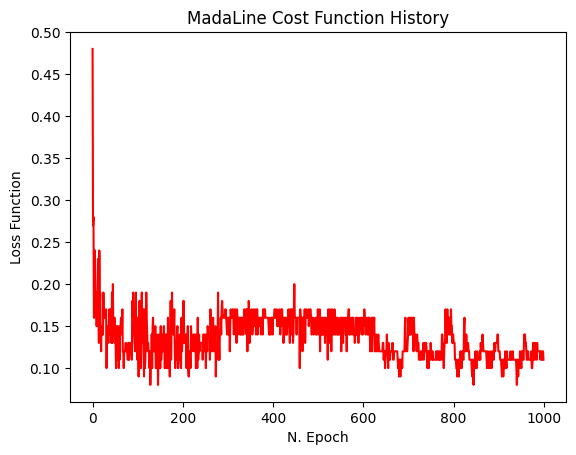

              precision    recall  f1-score   support

          -1       0.93      0.90      0.91       100
           1       0.90      0.93      0.92       100

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.91       200
weighted avg       0.92      0.92      0.91       200



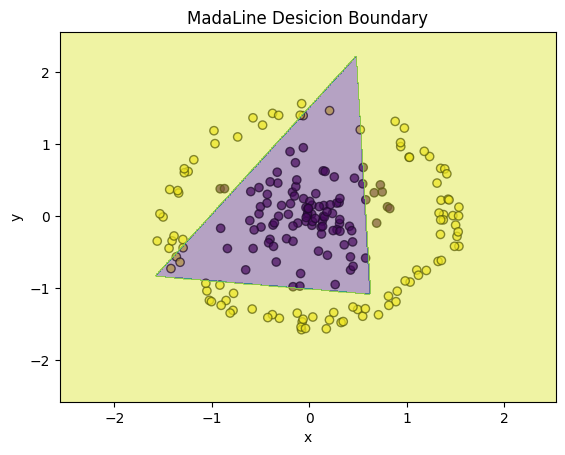

with 6 units in hidden layer


  2%|▏         | 22/1000 [00:00<00:06, 142.24it/s]

No more weight updating ...


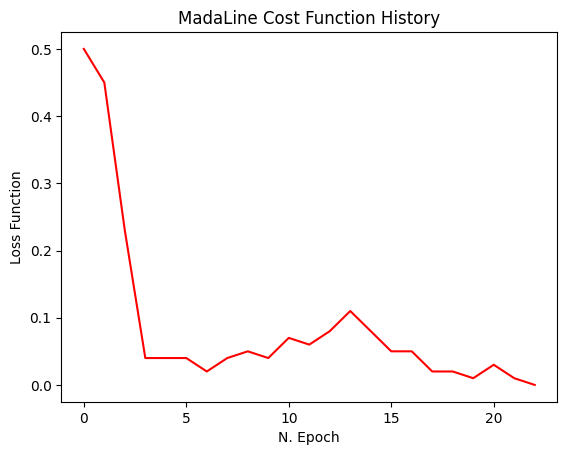

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



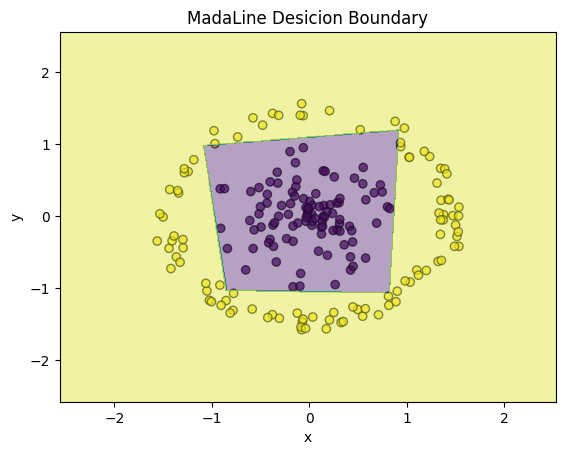

with 9 units in hidden layer


  1%|          | 7/1000 [00:00<00:12, 82.71it/s]

No more weight updating ...


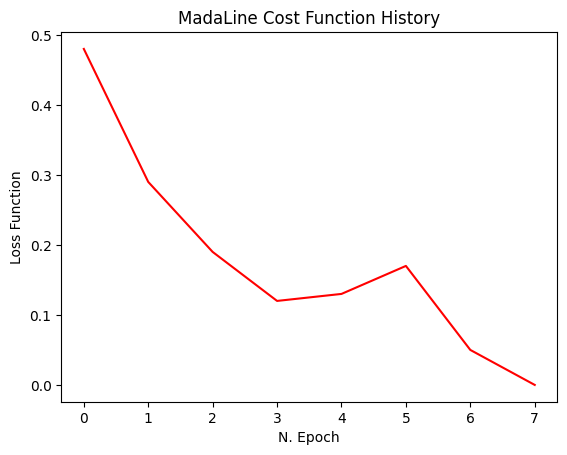

              precision    recall  f1-score   support

          -1       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       100

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



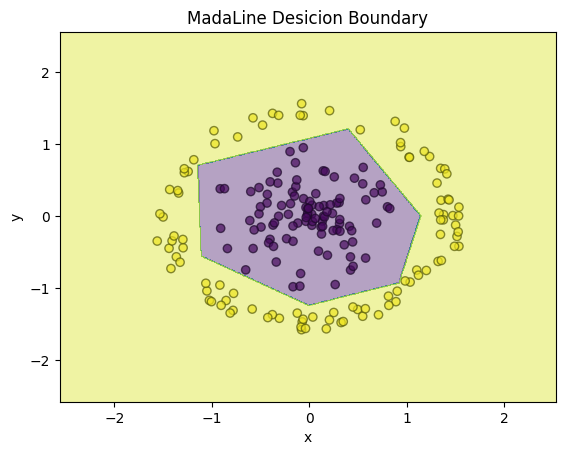

In [9]:
for N in [3, 6 ,  9]:
    print ("with %d units in hidden layer" % N)
    madaline = MadaLine(features_dimension = 2, hidden_units = N, learning_rate = 0.01, threshold = 0.01)
    # Split into features (X) and labels (Y)
    X = np.array(data[:, :2]).T
    Y = np.where(data[:, 2] == 1, 1, -1).reshape(1, X.shape[1])

    madaline.train(X.T, Y.T, n_iterations = 1000)
    madaline.plot_loss()
    madaline.evaluation(X.T, Y.T)
    madaline.plot_scatter(X, Y)